# Actividad Asíncrona IA

## Capítulo 3, Capítulo 4 y Capítulo 5

### Resolución de problemas

**Nombre:**  Alan Palma Travez

___

## Ejercicio 1. Cap 3 - Un array de Numpy
#### Seleccione la opción correcta y justifique su respuesta.

  a. Crece dinámicamente cuando se genera; permite arreglos de distintos tamaños y tipos.  
  
  b. Tiene un tamaño fijo cuando se genera, todos los elementos tienen datos de tipo homogéneo y mantienen el mismo tamaño en memoria.

  c. Crece dinámicamente cuando se genera y todos los elementos tienen datos de tipo homogéneo.  

  d. Tiene un tamaño fijo cuando se genera; permite arreglos de distintos tamaños y tipos.  


La opción correcta es la b: 
El tamaño de un array de numpy no puede crecer dinámicamente y sus datos son de tipo homogéneo (int32, float64, etc), por lo tanto, mantienen el mismo tamaño.

___

## Ejercicio 2. Cap 3 - ¿Qué característica se obtiene de la siguiente ejecución: *df.A.corr(df.B)*?
#### Seleccione la opción correcta y justifique su respuesta.
![image.png](attachment:image.png)

a.	Matriz de correlación tomando las variables numéricas por pares de ‘A’ y ‘B’.

b.	Correlaciones entre 'A' y las demás variables numéricas.´

c.	Correlación entre la columna 'A' y la columna 'B'.

d.	Estadísticas descriptivas de las columnas (variables).



La opción correcta es la **c**. Esta opción calcula la matriz the correlación entre las columnas 'A' y 'B'. ```df.A``` selecciona la columna 'A' y ```.coor(df.B)``` calcula la correlación entre estas dos columnas.

___

## Ejercicio 1. Cap 4 - Carga de datos sintéticos
**Descripción:** Genere un conjunto de datos que simule la **duración (minutos)** de llamadas al soporte técnico.  
**Supuesto razonable:** variable positiva, asimétrica (p. ej., distribución *Gamma* o *Lognormal*).

**Tareas**
1. Genere `n=500` observaciones con parámetros que considere razonables.
2. Guarde el resultado en un `DataFrame` con la columna `duracion_min`.
3. Muestre `head()` y un resumen con `describe()`.

> **Tip:** `stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(n)`

In [2]:
# Exporte las librerías necesarias
from scipy import stats
import numpy as np
import pandas as pd

# TODO: complete aquí
# 1. Defina el tamaño de la muestra (n)
n = 500

# 2. Asigne los parámetros mu y sigma de la distribución lognormal
mu = 3.0
sigma = 0.4

# 3. Genere los datos aleatorios
data = stats.lognorm(s=sigma, scale=np.exp(mu)).rvs(n)

# 4. Cree un DataFrame llamado df con una columna 'duracion_min'
df = pd.DataFrame(data, columns=["duracion_min"])

# 5. Muestre las primeras filas y el resumen estadístico
print("Primeras filas del DataFrame:")
print(df.head())
print("\nResumen estadístico del DataFrame:")
print(df.describe())

Primeras filas del DataFrame:
   duracion_min
0     16.591846
1     23.401618
2     12.837041
3     26.878721
4     20.834406

Resumen estadístico del DataFrame:
       duracion_min
count    500.000000
mean      21.586218
std        8.561785
min        4.778196
25%       15.508266
50%       20.131905
75%       26.579268
max       61.788840


## Ejercicio 2. Cap 4 - Función de densidad teórica vs datos
1. Ajuste una distribución **Lognormal** a los datos mediante máxima verosimilitud.
2. Sobreponga su **densidad** al histograma normalizado.
3. Reporte los parámetros estimados.

> **Tip:** `s, loc, scale = stats.lognorm.fit(df['duracion_min'], floc=0)`

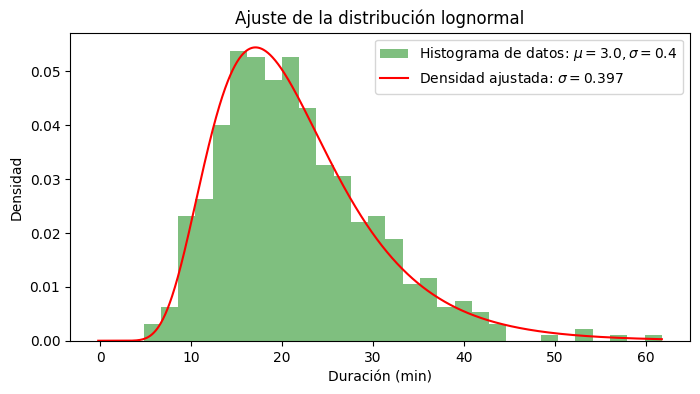

In [3]:
# Exporte las librerías necesarias
from scipy import stats
import matplotlib.pyplot as plt

# TODO: complete aquí
# 1. Ajuste los parámetros de la distribución lognormal con stats.lognorm.fit
shape, loc, scale = stats.lognorm.fit(df["duracion_min"], floc=0)

# 2. Genere un rango de valores (x) para la curva de densidad
x = np.linspace(min(data)-5, max(data), 1000)

# 3. Calcule la función de densidad teórica (pdf)
pdf_fitted = stats.lognorm.pdf(x, shape, loc, scale)

# 4. Grafique el histograma y la curva de densidad ajustada
plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, density=True, alpha=0.5, color='g', label='Histograma de datos: ' + f'$\mu={mu}, \sigma={sigma}$')
plt.plot(x, pdf_fitted, 'r-', label=f'Densidad ajustada: ' + f'$\sigma={shape:.3f}$')

# 5. Incluya etiquetas, título y leyenda
plt.xlabel('Duración (min)')
plt.ylabel('Densidad')
plt.title('Ajuste de la distribución lognormal')
plt.legend()
plt.show()

In [4]:
# Reportar resultados 
print("Parametros con los que se generaron los datos:")
print(f"Sigma: {sigma}")
print(f"Mean: {np.mean(data)}\n")

print(f"Parámetros ajustados de la distribución lognormal:")
print(f"Shape (sigma): {shape}")
print(f"Location (loc): {loc}")
print(f"Scale (mean): {scale}")

Parametros con los que se generaron los datos:
Sigma: 0.4
Mean: 21.586217919936665

Parámetros ajustados de la distribución lognormal:
Shape (sigma): 0.39674583084235854
Location (loc): 0
Scale (mean): 19.992992782990495


## Ejercicio 1. Cap 5 - Aplicación del Modelo de Aprendizaje Supervisado para Predicción Numérica

### Actividad 2: Regresión Lineal
2.1 Implementa un modelo de regresión lineal para predecir una variable numérica.

2.2 Entrena el modelo con un conjunto de datos y evalúa su rendimiento.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_curve, auc
)

In [6]:
# 2.1 Implementa un modelo de regresión lineal para predecir una variable numérica.

# Cargar le data set 
df = pd.read_csv('sample_101_MultiJetRun2010B.csv')

# Explorar los datos
display(df.head())
print(df.columns)
print(df.info())

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


Index(['Run', 'Lumi', 'Event', 'MR', 'Rsq', 'E1', 'Px1', 'Py1', 'Pz1', 'E2',
       'Px2', 'Py2', 'Pz2', 'HT', 'MET', 'nJets', 'nBJets'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     100 non-null    int64  
 1   Lumi    100 non-null    int64  
 2   Event   100 non-null    int64  
 3   MR      100 non-null    float64
 4   Rsq     100 non-null    float64
 5   E1      100 non-null    float64
 6   Px1     100 non-null    float64
 7   Py1     100 non-null    float64
 8   Pz1     100 non-null    float64
 9   E2      100 non-null    float64
 10  Px2     100 non-null    float64
 11  Py2     100 non-null    float64
 12  Pz2     100 non-null    float64
 13  HT      100 non-null    float64
 14  MET     100 non-null    float64
 15  nJets   100 non-null    int64  
 16  nBJets  100 non-null    int64  
dtypes: float64(12), int64(5)
mem

In [36]:
# Selecionar las columnas para el modelo
features = ["HT", "MET"]
target = "Rsq"

df_s = df[features + [target]]

# Clean data (if necessary)
print("Valores nulos por columna:")
print(df_s.isnull().sum())

Valores nulos por columna:
HT     0
MET    0
Rsq    0
dtype: int64


In [37]:
# Crear el set de entrenamiento y prueba
X = df_s[features]
y = df_s[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del set de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del set de prueba: {X_test.shape[0]} muestras")

Tamaño del set de entrenamiento: 70 muestras
Tamaño del set de prueba: 30 muestras


In [38]:
# 2.2 Entrena el modelo con un conjunto de datos y evalúa su rendimiento.

# Estandardizar o normalizar los datos 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

print("Coeficientes del modelo:")
print(model.coef_)

print("Primeras 5 predicciones vs valores reales:")
for i in range(5):
    print(f"Predicción: {y_pred[i]}, Real: {y_test.iloc[i]}")

Coeficientes del modelo:
[-0.00767138  0.0182341 ]
Primeras 5 predicciones vs valores reales:
Predicción: 0.022462342248900643, Real: 0.0298679
Predicción: 0.04206388842305834, Real: 0.00643042
Predicción: 0.007799974852455876, Real: 0.012711
Predicción: 0.026749497549252606, Real: 0.016776
Predicción: 0.002128825655117423, Real: 0.0122972


In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Métricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2: {r2}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Métricas del modelo:
Error cuadrático medio (MSE): 0.00023501374100226704
R^2: 0.4439464079966591
Raíz del error cuadrático medio (RMSE): 0.015330157892281052


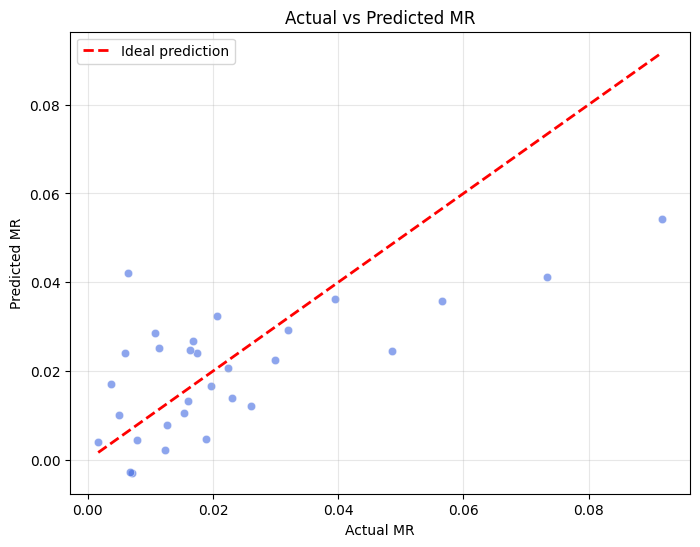

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Ideal prediction")
plt.title("Actual vs Predicted MR")
plt.xlabel("Actual MR")
plt.ylabel("Predicted MR")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

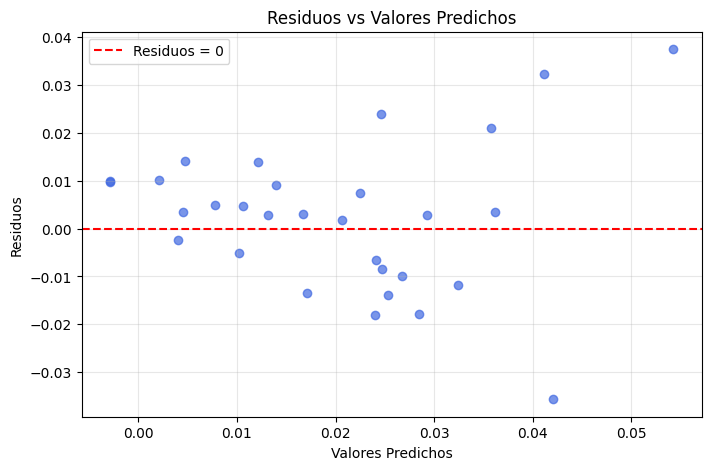

In [42]:
# Calcular residuos
residuals = y_test - y_pred

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, color='royalblue')
plt.axhline(y=0, color='r', linestyle='--', label='Residuos = 0')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

## Ejercicio 2. Cap 5 - Aplicación del Modelo de Aprendizaje Supervisado para Clasificación

### Actividad 3: Clasificación con Regresión Logística
3.1 Utiliza el algoritmo de regresión logística para clasificar datos en dos categorías.

3.2 Evalúa la precisión y otras métricas del modelo.

In [129]:
# 3.1 Utiliza el algoritmo de regresión logística para clasificar datos en dos categorías.
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
 
# Nombres
class_names = digits.target_names
feature_names = digits.feature_names

print("Nombres de las clases:", class_names)
print("Nombres de las características:", feature_names)

Nombres de las clases: [0 1 2 3 4 5 6 7 8 9]
Nombres de las características: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [130]:
# Seleccionar dos digitos para clasificación binaria
class_names_binary = class_names[:2]
X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

In [122]:
# Crear data frame 
df = pd.DataFrame(X_binary, columns=feature_names)
df["species"] = [class_names[i] for i in y_binary]

# Clean data (if necessary)
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
species      0
Length: 65, dtype: int64


In [123]:
# Dividir los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

print(f"Tamaño del set de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del set de prueba: {X_test.shape[0]} muestras")

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

Tamaño del set de entrenamiento: 252 muestras
Tamaño del set de prueba: 108 muestras


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [124]:
# 3.2 Evalúa la precisión y otras métricas del modelo.
# Evaluar el modelo
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Métricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2: {r2}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Métricas del modelo:
Error cuadrático medio (MSE): 0.0
R^2: 1.0
Raíz del error cuadrático medio (RMSE): 0.0


In [125]:
print("Reporte de clasificación:")
rep_class = classification_report(y_test, y_pred)
print(rep_class)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        52

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



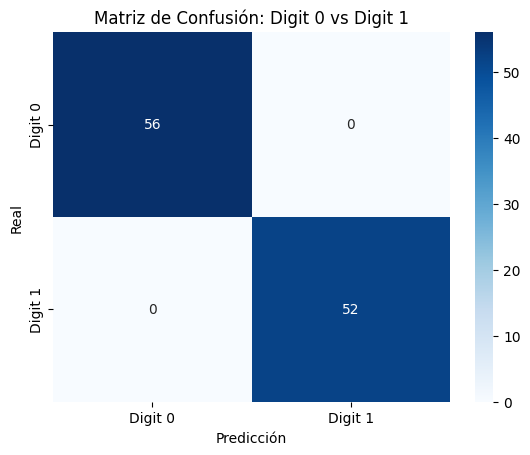

In [131]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Digit 0", "Digit 1"],
            yticklabels=["Digit 0", "Digit 1"])
plt.title("Matriz de Confusión: Digit 0 vs Digit 1")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


 ___

# Fin